In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Cutlets.csv")


In [4]:
df

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [5]:
df.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [7]:
df[df.duplicated()]

,Unit A,Unit B


Checking whether the Data is Normaly Distributed or Not.

In [10]:
import statsmodels.api as sm

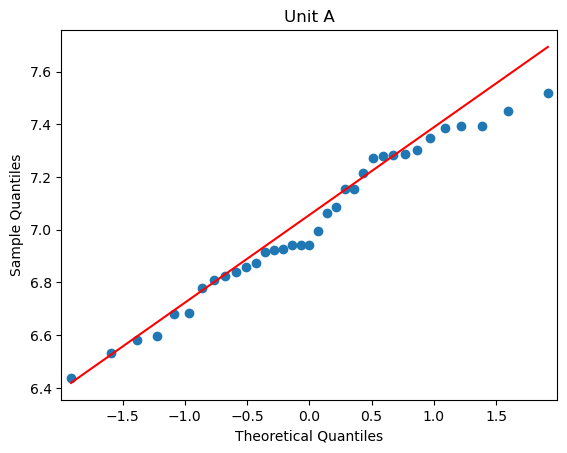

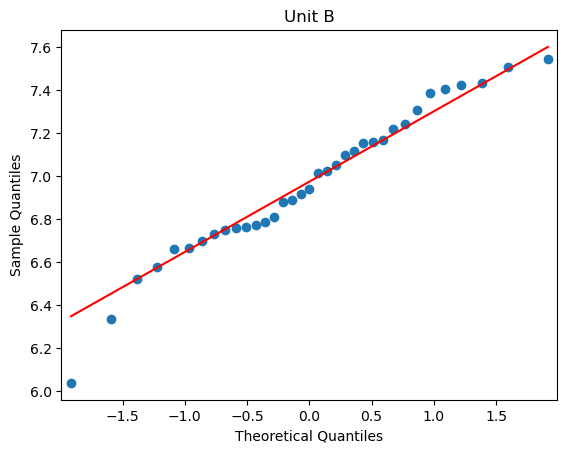

In [16]:
#plotting Q-Q plot
sm.qqplot(df["Unit A"], line='q', color='red')
plt.title("Unit A")

sm.qqplot(df["Unit B"], line='q', color='g')
plt.title("Unit B")

plt.show()

Here we can see that, data is not slightly normally distributed.

Comparing Unit A and Unit B

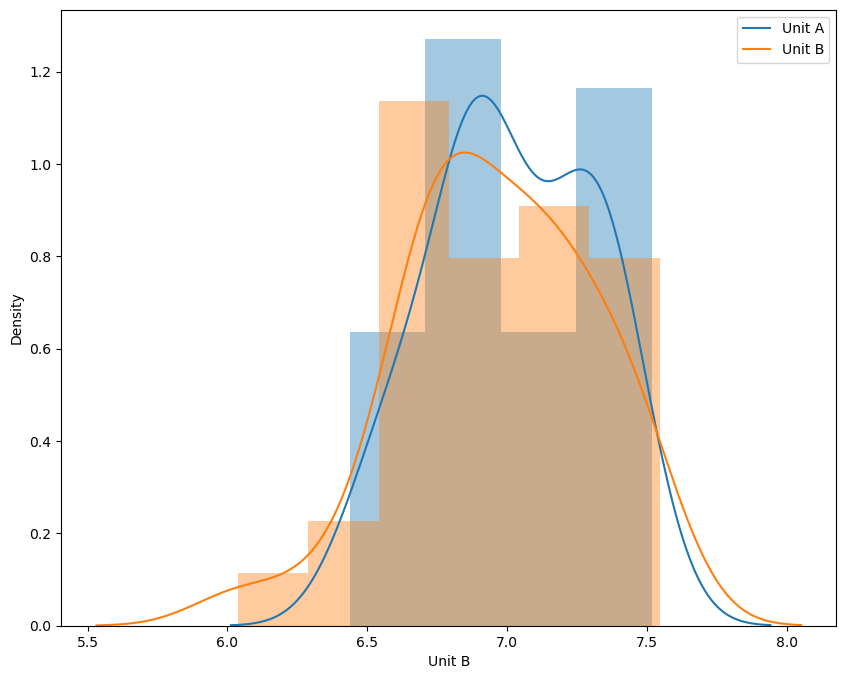

In [20]:
plt.figure(figsize=(10,8))
labels = ["Unit A", 'Unit B']
sns.distplot(df["Unit A"], kde = True)
sns.distplot(df["Unit B"], kde=True)
plt.legend(labels)

According to the bussiness requirement,  we need to analyze and draw inferences at 5% of significance level.

We can conduct <b>2-tail t-test</b> on two independent numerical columns.

SO we have two Hypothesis:<br>
<b>Null Hypothesis(H0): </b> there is no significance difference in the diameter of the cutlet between two units.<br>
<b>Alternate Hypothesis(H1):</b> there is significance difference

Significance = 5% <br>
alpha = 0.05 <br>
alpha/2 = 0.025

In [21]:
from scipy.stats import stats

In [22]:
stats, p_value = stats.ttest_ind(df["Unit A"], df["Unit B"], alternative="two-sided")

In [24]:
print("Statistics: ", stats)
print("p_value", p_value)

Statistics:  0.7228688704678063
p_value 0.4722394724599501


In [26]:
alpha = 0.025

if p_value<=alpha:
    print("We reject Null Hypothesis")
else:
    print("We fail to reject Null Hypothesis")

We fail to reject Null Hypothesis
